### libraries

In [1]:
library(stringr) #for regexes
library(dplyr) #for data manipulation etc
library(tidyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Suicide Bombing Data

### getting suicide bombing data 

In [2]:
#getting suicide bomb attack data (1995-2016)
sa <- read.csv('PakistanSuicideAttacks Ver 11 (30-November-2017) - Copy.csv', fileEncoding = 'latin1') 

### wrangling Suicide Attack Data

In [3]:
head(sa, 3)

S.,Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.
1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,N/A,Islamabad,33.7180,73.0718,Capital,⋯,None,14,15,NA,60,2,,,15.835,60.503
2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,,N/A,Karachi,24.9918,66.9911,Sindh,⋯,None,NA,3,NA,3,1,,,23.770,74.786
3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,,7:45 AM,Karachi,24.9918,66.9911,Sindh,⋯,Christian,13,15,20,40,1,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil Hospital Karachi 3. PN Shifa,31.460,88.628


In [4]:
str(sa)

'data.frame':	496 obs. of  26 variables:
 $ S.                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                   : Factor w/ 455 levels "Friday-April 1-2011",..: 267 151 440 41 38 291 192 61 145 318 ...
 $ Islamic.Date           : Factor w/ 454 levels "05 Zeqad 1437 A.H.",..: 252 27 256 356 367 334 427 133 48 98 ...
 $ Blast.Day.Type         : Factor w/ 4 levels "","Holiday","Weekend",..: 2 4 4 4 4 2 4 4 4 4 ...
 $ Holiday.Type           : Factor w/ 16 levels "","Ashura","Ashura Holiday",..: 16 1 1 1 1 5 1 1 1 1 ...
 $ Time                   : Factor w/ 217 levels "","10:00:00 AM",..: 209 209 146 24 209 60 1 39 196 209 ...
 $ City                   : Factor w/ 93 levels "Attock ","ATTOCK",..: 25 30 31 30 67 69 69 31 31 58 ...
 $ Latitude               : num  33.7 25 25 25 30.2 ...
 $ Longitude              : Factor w/ 101 levels "","62.35","66.4447",..: 87 9 9 9 17 86 86 9 9 31 ...
 $ Province               : Factor w/ 9 levels "AJK","Balochistan",..: 4 9 9 9 3 8 8 9 9 6 ..

In [5]:
sa$Injured.Max <- as.numeric(as.character(sa$Injured.Max))

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

Warning message:
: Removed 51 rows containing non-finite values (stat_ydensity).Warning message:
: Removed 51 rows containing non-finite values (stat_boxplot).

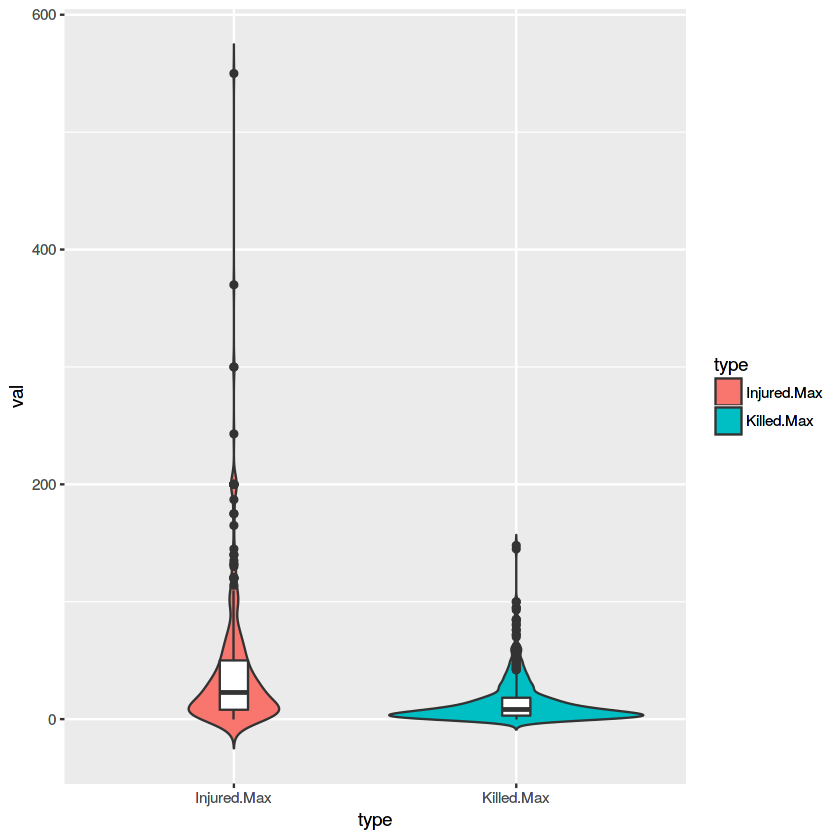

In [6]:
sa %>% select(Killed.Max, Injured.Max) %>% gather('type', 'val') %>% ggplot(aes(x=type, y=val)) + 
geom_violin(aes(fill=type), trim=FALSE) + 
geom_boxplot(width=0.1)

In [7]:
summary(sa$Injured.Max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    8.00   23.00   39.46   50.00  550.00      35 

In [8]:
sa <- sa[-1]

##### Cleaning Gregorian Date

we already know that some dates are not in the correct format

In [9]:
#checking data types
str(sa)

'data.frame':	496 obs. of  25 variables:
 $ Date                   : Factor w/ 455 levels "Friday-April 1-2011",..: 267 151 440 41 38 291 192 61 145 318 ...
 $ Islamic.Date           : Factor w/ 454 levels "05 Zeqad 1437 A.H.",..: 252 27 256 356 367 334 427 133 48 98 ...
 $ Blast.Day.Type         : Factor w/ 4 levels "","Holiday","Weekend",..: 2 4 4 4 4 2 4 4 4 4 ...
 $ Holiday.Type           : Factor w/ 16 levels "","Ashura","Ashura Holiday",..: 16 1 1 1 1 5 1 1 1 1 ...
 $ Time                   : Factor w/ 217 levels "","10:00:00 AM",..: 209 209 146 24 209 60 1 39 196 209 ...
 $ City                   : Factor w/ 93 levels "Attock ","ATTOCK",..: 25 30 31 30 67 69 69 31 31 58 ...
 $ Latitude               : num  33.7 25 25 25 30.2 ...
 $ Longitude              : Factor w/ 101 levels "","62.35","66.4447",..: 87 9 9 9 17 86 86 9 9 31 ...
 $ Province               : Factor w/ 9 levels "AJK","Balochistan",..: 4 9 9 9 3 8 8 9 9 6 ...
 $ Location               : Factor w/ 488 levels "","1)F

In [10]:
#convert data type from factor to character
sa$Date <- as.character(sa$Date)

In [11]:
sa %>% filter(is.na(Date))

Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)

Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,Location,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.


In [12]:
#check the dirty dates and the format and track indexes
hash_count <- str_count(sa$Date, "-")
space_count <- str_count(sa$Date, " ")

#check unique
cat('hash:', unique(hash_count), ' | space:', unique(space_count))

hash: 2 3  | space: 1 0

In [13]:
#identify dirty dates
sa$Date[which(hash_count == 3)] 

[1] "Tuesday-Oct-25-2016"       "Saturday-Nov-12-2016"     
 [3] "Saturday-Nov-26-2016"      "Tuesday-Feb-7-2017"       
 [5] "Monday-Feb-13-2017"        "Wednesday-Feb-15-2017"    
 [7] "Wednesday-Feb-15-2017"     "Wednesday-Feb-15-2017"    
 [9] "Thursday-Feb-16-2017"      "Tuesday-Feb-21-2017"      
[11] "Wednesday-April-05-2017"   "Friday-May-12-2017"       
[13] "Saturday-May-20-2017"      "Friday-June-23-2017"      
[15] "Monday-July-10-2017"       "Monday-July-17-2017"      
[17] "Monday-July-17-2017"       "Monday-July-24-2017"      
[19] "Saturday-August-12-2017"   "Thursday-October-05-2017" 
[21] "Thursday-October-19-2017"  "Thursday-November-9-2017" 
[23] "Friday-November-24-2017"   "Saturday-November-25-2017"

In [14]:
sa %>% filter(is.na(Date))

Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)

Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,Location,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.


In [15]:
#function to clean date
gr_date_clean <- function(x) {
    ind_sec = str_locate_all(x, '-')[[1]][2]
    str_sub(x,ind_sec, ind_sec) <- " "
    return (x)
}

#create cleaned dataframe
temp <- t(data.frame(lapply(sa$Date[which(hash_count == 3)], gr_date_clean)))
row.names(temp) <- NULL

#replace unclean values with cleaned values
sa$Date[which(hash_count == 3)] <- temp

In [16]:
sa %>% filter(is.na(Date))

Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)

Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,Location,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.


In [17]:
#check if the dates have been cleaned
sa$Date[which(hash_count == 3)]

[1] "Tuesday-Oct 25-2016"       "Saturday-Nov 12-2016"     
 [3] "Saturday-Nov 26-2016"      "Tuesday-Feb 7-2017"       
 [5] "Monday-Feb 13-2017"        "Wednesday-Feb 15-2017"    
 [7] "Wednesday-Feb 15-2017"     "Wednesday-Feb 15-2017"    
 [9] "Thursday-Feb 16-2017"      "Tuesday-Feb 21-2017"      
[11] "Wednesday-April 05-2017"   "Friday-May 12-2017"       
[13] "Saturday-May 20-2017"      "Friday-June 23-2017"      
[15] "Monday-July 10-2017"       "Monday-July 17-2017"      
[17] "Monday-July 17-2017"       "Monday-July 24-2017"      
[19] "Saturday-August 12-2017"   "Thursday-October 05-2017" 
[21] "Thursday-October 19-2017"  "Thursday-November 9-2017" 
[23] "Friday-November 24-2017"   "Saturday-November 25-2017"

In [18]:
sa %>% filter(Islamic.Date == '13/11/1436') %>% select(Date)

Date
Thursay-Aug 27-2015


In [19]:
tail(sa,100)

,Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,Location,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.
397,Friday-July 26-2013,19/09/1434,Working Day,,Evening,Kuram Agency,32.9746,70.1456,KPK,Parachinar Bazaar,⋯,Shiite,43,50,180,200,2,,Parachinar Headquarters Hospital,26.015,78.827
398,Thursday-August 8-2013,2/10/1434,Holiday,Eid Holidays,,Quetta,30.2095,67.0182,Baluchistan,Police Headquarters Quetta,⋯,None,30,38,50,60,1,8kg,Civil Hospital and CMH Quetta,31.060,87.908
399,Sunday-September 22-2013,18/11/1434,Holiday,,,Peshawar,34.0043,71.5448,KPK,All Saints Church near Qissa Khawani bazaar in Peshawar,⋯,None,78,81,100,145,2,,Lady Reading Hospital,29.840,85.712
400,Wednesday-October 2-2013,28/11/1434,Working Day,,,Chaman,30.9222,66.4447,Baluchistan,southwestern border crossin between Afghanistan and Pakistan,⋯,None,6,8,10,16,1,,,24.420,75.956
401,Thursday-October 3-2013,29/11/1434,Working Day,,,Hangu,33.5351,71.0713,KPK,Spin Tall region of Hangu,⋯,None,15,17,22,22,1,,,25.960,78.728
402,Friday-October 11-2013,7/12/1434,Working Day,,,South waziristan,32.3202,69.8597,FATA,Wana-main town of South waziristan,⋯,None,2,2,2,2,,,,19.610,67.298
403,Wednesday-October 16-2013,12/12/1434,Holiday,Eid Holidays,Evening,D. I Khan,31.8238,70.9095,KPK,Tehsil Kulachi-50km away from D.I Khan,⋯,None,8,9,30,30,,,,28.610,83.498
404,Saturday-November 16-2013,13/01/1435,Holiday,Weekend,,Bannu,32.9350,70.6688,KPK,Near River Kurram bridge,⋯,None,0,0,7,7,,,CMH Bannu,13.090,55.562
405,Tuesday-November 19-2013,16/01/1435,Working Day,,,North waziristan,32.9746,70.1456,FATA,Mir Ali town of Miramshah,⋯,None,7,7,1,1,,,,12.545,54.581
406,Friday-November 22-2013,19/01/1435,Working Day,,10:55 AM,Khyber Agency,34.0211,71.2874,KPK,Torkhan customs office in Landikotal,⋯,None,0,0,26,26,,5kg,Hayatabad Medical Complex-Peshawar,15.985,60.773


In [20]:
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Jan ', '-January ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Feb ', '-February ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Mar ', '-March ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Apr ', '-April ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Aug ', '-August ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Sep ', '-September ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Oct ', '-October ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Nov ', '-November ')))
sa$Date <- unlist(sapply(sa$Date, function(x) str_replace_all(x, '-Dec ', '-December ')))

In [21]:
tail(sa, 100)

,Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,Location,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.
397,Friday-July 26-2013,19/09/1434,Working Day,,Evening,Kuram Agency,32.9746,70.1456,KPK,Parachinar Bazaar,⋯,Shiite,43,50,180,200,2,,Parachinar Headquarters Hospital,26.015,78.827
398,Thursday-August 8-2013,2/10/1434,Holiday,Eid Holidays,,Quetta,30.2095,67.0182,Baluchistan,Police Headquarters Quetta,⋯,None,30,38,50,60,1,8kg,Civil Hospital and CMH Quetta,31.060,87.908
399,Sunday-September 22-2013,18/11/1434,Holiday,,,Peshawar,34.0043,71.5448,KPK,All Saints Church near Qissa Khawani bazaar in Peshawar,⋯,None,78,81,100,145,2,,Lady Reading Hospital,29.840,85.712
400,Wednesday-October 2-2013,28/11/1434,Working Day,,,Chaman,30.9222,66.4447,Baluchistan,southwestern border crossin between Afghanistan and Pakistan,⋯,None,6,8,10,16,1,,,24.420,75.956
401,Thursday-October 3-2013,29/11/1434,Working Day,,,Hangu,33.5351,71.0713,KPK,Spin Tall region of Hangu,⋯,None,15,17,22,22,1,,,25.960,78.728
402,Friday-October 11-2013,7/12/1434,Working Day,,,South waziristan,32.3202,69.8597,FATA,Wana-main town of South waziristan,⋯,None,2,2,2,2,,,,19.610,67.298
403,Wednesday-October 16-2013,12/12/1434,Holiday,Eid Holidays,Evening,D. I Khan,31.8238,70.9095,KPK,Tehsil Kulachi-50km away from D.I Khan,⋯,None,8,9,30,30,,,,28.610,83.498
404,Saturday-November 16-2013,13/01/1435,Holiday,Weekend,,Bannu,32.9350,70.6688,KPK,Near River Kurram bridge,⋯,None,0,0,7,7,,,CMH Bannu,13.090,55.562
405,Tuesday-November 19-2013,16/01/1435,Working Day,,,North waziristan,32.9746,70.1456,FATA,Mir Ali town of Miramshah,⋯,None,7,7,1,1,,,,12.545,54.581
406,Friday-November 22-2013,19/01/1435,Working Day,,10:55 AM,Khyber Agency,34.0211,71.2874,KPK,Torkhan customs office in Landikotal,⋯,None,0,0,26,26,,5kg,Hayatabad Medical Complex-Peshawar,15.985,60.773


In [22]:
sa[which(sa$Islamic.Date == '13/11/1436'),'Date'] <- 'Thursday-August 27-2015'

In [23]:
a <- sa %>% filter(Islamic.Date == '13/11/1436') %>% select(Date) %>% as.character

In [24]:
#converting Date type to Date
sa$Date <- as.Date(sa$Date, format = '%A-%B %d-%Y')

In [25]:
sa %>% filter(is.na(Date))

Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)Warning message:
In cbind(parts$left, ellip_h, parts$right, deparse.level = 0L): number of rows of result is not a multiple of vector length (arg 2)

Date,Islamic.Date,Blast.Day.Type,Holiday.Type,Time,City,Latitude,Longitude,Province,Location,⋯,Targeted.Sect.if.any,Killed.Min,Killed.Max,Injured.Min,Injured.Max,No..of.Suicide.Blasts,Explosive.Weight..max.,Hospital.Names,Temperature.C.,Temperature.F.


In [26]:
#adding columns by splitting date
sa$gr_week_day <- format(sa$Date, '%a')
sa$gr_day <- format(sa$Date, '%d')
sa$gr_month <- format(sa$Date, '%m')
sa$gr_year <- format(sa$Date, '%Y')

##### Cleaning Islamic Date

In [27]:
tail(sa['Islamic.Date'], 100)

,Islamic.Date
397,19/09/1434
398,2/10/1434
399,18/11/1434
400,28/11/1434
401,29/11/1434
402,7/12/1434
403,12/12/1434
404,13/01/1435
405,16/01/1435
406,19/01/1435


In [28]:
#using regex to extract date parts
pattern <- '([:digit:]{1,})[ |/]([:print:]*)[ |/]([:digit:]{1,})([:print:]*)'
islamic_date_parts <- str_match(sa$Islamic.Date, pattern)

In [29]:
tail(islamic_date_parts,100)

"[397,]",19/09/1434,19,09,1434,
"[398,]",2/10/1434,2,10,1434,
"[399,]",18/11/1434,18,11,1434,
"[400,]",28/11/1434,28,11,1434,
"[401,]",29/11/1434,29,11,1434,
"[402,]",7/12/1434,7,12,1434,
"[403,]",12/12/1434,12,12,1434,
"[404,]",13/01/1435,13,01,1435,
"[405,]",16/01/1435,16,01,1435,
"[406,]",19/01/1435,19,01,1435,
"[407,]",14/02/1435,14,02,1435,


#using regex to extract date parts
pattern <- '([:digit:]{1,}) ([:print:]*) ([:digit:]{1,})([:print:]*)'
islamic_date_parts <- str_match(sa$Islamic.Date, pattern)

#checking extracted matrix
tail(islamic_date_parts,100)

In [30]:
#check year After Hijra 
unique(islamic_date_parts[,5])

[1] " A.H"   " A.H."  ""       " A.H. "

In [31]:
#create dataframe from extracted parts
isl_df <- data.frame('isl_date'=islamic_date_parts[,1],'isl_day'=islamic_date_parts[,2], 'dirty_isl_month' = islamic_date_parts[,3], 'isl_year_AH'=islamic_date_parts[,4])

In [32]:
head(isl_df,3)

isl_date,isl_day,dirty_isl_month,isl_year_AH
25 Jumaada al-THaany 1416 A.H,25,Jumaada al-THaany,1416
10 SHa`baan 1421 A.H,10,SHa`baan,1421
25 safar 1423 A.H,25,safar,1423


In [33]:
str(isl_df)

'data.frame':	496 obs. of  4 variables:
 $ isl_date       : Factor w/ 454 levels "05 Zeqad 1437 A.H.",..: 252 27 256 356 367 334 427 133 48 98 ...
 $ isl_day        : Factor w/ 33 levels "05","08","09",..: 21 5 21 26 28 15 32 13 7 10 ...
 $ dirty_isl_month: Factor w/ 32 levels "01","02","03",..: 15 25 23 20 14 30 17 19 4 20 ...
 $ isl_year_AH    : Factor w/ 19 levels "1416","1421",..: 1 2 3 3 4 4 5 5 5 5 ...


In [34]:
isl_df$isl_date <- as.character(isl_df$isl_date)
isl_df$isl_day <- as.character(isl_df$isl_day)
isl_df$dirty_isl_month <- as.character(isl_df$dirty_isl_month)
isl_df$isl_year_AH <- as.character(isl_df$isl_year_AH)

In [35]:
str(isl_df)

'data.frame':	496 obs. of  4 variables:
 $ isl_date       : chr  "25 Jumaada al-THaany 1416 A.H" "10 SHa`baan 1421 A.H" "25 safar 1423 A.H" "3 Raby` al-THaany 1423 A.H" ...
 $ isl_day        : chr  "25" "10" "25" "3" ...
 $ dirty_isl_month: chr  "Jumaada al-THaany" "SHa`baan" "safar" "Raby` al-THaany" ...
 $ isl_year_AH    : chr  "1416" "1421" "1423" "1423" ...


In [36]:
head(isl_df)

isl_date,isl_day,dirty_isl_month,isl_year_AH
25 Jumaada al-THaany 1416 A.H,25,Jumaada al-THaany,1416
10 SHa`baan 1421 A.H,10,SHa`baan,1421
25 safar 1423 A.H,25,safar,1423
3 Raby` al-THaany 1423 A.H,3,Raby` al-THaany,1423
4 Jumaada al-awal 1424 A.H,4,Jumaada al-awal,1424
2 Thw al-Qi`dah 1424 A.H.,2,Thw al-Qi`dah,1424


In [37]:
unique(isl_df$dirty_isl_month)

[1] "Jumaada al-THaany" "SHa`baan"          "safar"            
 [4] "Raby` al-THaany"   "Jumaada al-awal"   "Thw al-Qi`dah"    
 [7] "MuHarram"          "Raby` al-awal"     "04"               
[10] "Rajab"             "SHawwal"           "RamaDHaan"        
[13] "Thw al-Hijjah"     "01"                "06"               
[16] "07"                "08"                "09"               
[19] "10"                "12"                "02"               
[22] "03"                "05"                "11"               
[25] "Shaban"            "Zeqad"             "Zilhaj"           
[28] "Jamadi-ul-Awal"    "Jumada al-awwal"   "Shawaal"          
[31] "Safar"             "Rabi Al-Awwal"

In [38]:
#dictionary for cleaning islamic months
islamic_months <- list(
    'MuHarram' = 'muharram',
    '01' = 'muharram',
    'safar' = 'safar',
    'Safar' = 'safar',
    '02' = 'safar',
    'Raby` al-awal' = 'rabi al-awwal',
    'Rabi Al-Awwal' = 'rabi al-awwal',
    '03' = 'rabi al-awwal',
    'Raby` al-THaany' = 'rabi ath-thani',
    '04' = 'rabi ath-thani',
    'Jumaada al-awal' = 'jumada al-ula',
    'Jamadi-ul-Awal' = 'jumada al-ula',
    'Jumada al-awwal' ='jumada al-ula',
    '05' ='jumada al-ula',
    'Jumaada al-THaany' = 'jumada al-akhira',
    '06' = 'jumada al-akhira',
    'Rajab' = 'rajab',
    '07' = 'rajab',
    'SHa`baan' = 'shaban',
    'Shaban' = 'shaban',
    '08' = 'shaban',
    'RamaDHaan' = 'ramadan',
    '09' = 'ramadan',
    'SHawwal' = 'shawal',
    'Shawaal' = 'shawal',
    '10' = 'shawal',
    'Thw al-Qi`dah' = 'dhu al-qadah',
    'Zeqad' = 'dhu al-qadah',
    '11' = 'dhu al-qadah',
    'Thw al-Hijjah' = 'dhu al-hijjah',
    'Zilhaj' = 'dhu al-hijjah',
    '12' = 'dhu al-hijjah'
)

In [39]:
isl_df$isl_month <- unlist(lapply(isl_df$dirty_isl_month, function(x) islamic_months[[x]]))

In [40]:
head(isl_df)

isl_date,isl_day,dirty_isl_month,isl_year_AH,isl_month
25 Jumaada al-THaany 1416 A.H,25,Jumaada al-THaany,1416,jumada al-akhira
10 SHa`baan 1421 A.H,10,SHa`baan,1421,shaban
25 safar 1423 A.H,25,safar,1423,safar
3 Raby` al-THaany 1423 A.H,3,Raby` al-THaany,1423,rabi ath-thani
4 Jumaada al-awal 1424 A.H,4,Jumaada al-awal,1424,jumada al-ula
2 Thw al-Qi`dah 1424 A.H.,2,Thw al-Qi`dah,1424,dhu al-qadah


In [41]:
unique(isl_df$isl_month)

[1] "jumada al-akhira" "shaban"           "safar"            "rabi ath-thani"  
 [5] "jumada al-ula"    "dhu al-qadah"     "muharram"         "rabi al-awwal"   
 [9] "rajab"            "shawal"           "ramadan"          "dhu al-hijjah"

In [42]:
#check if number of rows is same before merging dataframes
nrow(sa)
nrow(isl_df)

[1] 496

[1] 496

In [43]:
#merge dataframes
sa2 <- merge(sa, isl_df, by.x='Islamic.Date', by.y='isl_date', all.x=TRUE)

In [44]:
sa2 <- sa2[!duplicated(sa2),]
rownames(sa2) <- NULL

In [45]:
#check col names for new dataframe
names(sa2)

[1] "Islamic.Date"            "Date"                   
 [3] "Blast.Day.Type"          "Holiday.Type"           
 [5] "Time"                    "City"                   
 [7] "Latitude"                "Longitude"              
 [9] "Province"                "Location"               
[11] "Location.Category"       "Location.Sensitivity"   
[13] "Open.Closed.Space"       "Influencing.Event.Event"
[15] "Target.Type"             "Targeted.Sect.if.any"   
[17] "Killed.Min"              "Killed.Max"             
[19] "Injured.Min"             "Injured.Max"            
[21] "No..of.Suicide.Blasts"   "Explosive.Weight..max." 
[23] "Hospital.Names"          "Temperature.C."         
[25] "Temperature.F."          "gr_week_day"            
[27] "gr_day"                  "gr_month"               
[29] "gr_year"                 "isl_day"                
[31] "dirty_isl_month"         "isl_year_AH"            
[33] "isl_month"

In [46]:
class(sa2[,'Date'])

[1] "Date"

In [47]:
sa2[,c('Date','Islamic.Date', 'dirty_isl_month', 'isl_day', 'isl_month', 'isl_year_AH')]



Date,Islamic.Date,dirty_isl_month,isl_day,isl_month,isl_year_AH
2016-08-08,05 Zeqad 1437 A.H.,Zeqad,05,dhu al-qadah,1437
2017-04-05,08 Rajab 1438 A.H,Rajab,08,rajab,1438
2017-02-07,09 Jamadi-ul-Awal 1438 A.H.,Jamadi-ul-Awal,09,jumada al-ula,1438
2014-11-02,10/01/1436,01,10,muharram,1436
2015-10-23,10/01/1437,01,10,muharram,1437
2012-03-03,10/04/1433,04,10,rabi ath-thani,1433
2014-02-10,10/04/1435,04,10,rabi ath-thani,1435
2015-01-30,10/04/1436,04,10,rabi ath-thani,1436
2011-05-13,10/06/1432,06,10,jumada al-akhira,1432
2013-04-20,10/06/1434,06,10,jumada al-akhira,1434


In [48]:
str(sa2)

'data.frame':	496 obs. of  33 variables:
 $ Islamic.Date           : Factor w/ 454 levels "05 Zeqad 1437 A.H.",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Date                   : Date, format: "2016-08-08" "2017-04-05" ...
 $ Blast.Day.Type         : Factor w/ 4 levels "","Holiday","Weekend",..: 4 4 4 2 2 2 4 1 4 4 ...
 $ Holiday.Type           : Factor w/ 16 levels "","Ashura","Ashura Holiday",..: 1 1 1 16 3 16 1 1 1 1 ...
 $ Time                   : Factor w/ 217 levels "","10:00:00 AM",..: 1 136 96 1 1 1 1 1 110 1 ...
 $ City                   : Factor w/ 93 levels "Attock ","ATTOCK",..: 67 41 5 92 27 63 63 74 10 3 ...
 $ Latitude               : num  30.2 31.5 32.9 31.6 28.3 ...
 $ Longitude              : Factor w/ 101 levels "","62.35","66.4447",..: 15 98 35 100 23 58 58 22 62 57 ...
 $ Province               : Factor w/ 9 levels "AJK","Balochistan",..: 2 8 7 8 9 7 7 9 7 6 ...
 $ Location               : Factor w/ 488 levels "","1)First blast lower mal gate 2)Ghaznavi street urdu bazar 3) B

sa2[,c('Islamic.Date', 'dirty_isl_month', 'Temperature.C.', 'Temperature.F.')] <- NULL

### Checking Categorical Data

In [49]:
#convert from factor to character
sa2$City <- as.character(sa2$City)
sa2$Province <- as.character(sa2$Province)
sa2$Blast.Day.Type <- as.character(sa2$Blast.Day.Type)
sa2$Location.Category <- as.character(sa2$Location.Category)
sa2$Target.Type <- as.character(sa2$Target.Type)
sa2$Open.Closed.Space <- as.character(sa2$Open.Closed.Space)
sa2$Targeted.Sect.if.any <- as.character(sa2$Targeted.Sect.if.any)
sa2$Time <- as.character(sa2$Time)

In [50]:
counts <- sa2 %>% group_by(Blast.Day.Type) %>% summarize(n_row=length(Blast.Day.Type))
counts

Blast.Day.Type,n_row
,10
Holiday,78
Weekend,5
Working Day,403


In [51]:
as.matrix(counts)

Blast.Day.Type,n_row
,10
Holiday,78
Weekend,5
Working Day,403


In [52]:
counts <- sa2 %>% group_by(Holiday.Type) %>% summarize(n_row=length(Holiday.Type))
counts

Holiday.Type,n_row
,424
Ashura,4
Ashura Holiday,2
Christmas/ birthday of Quaid-e-Azam,1
Christmas/birthday of Quaid-e-Azam,1
Defence Day,1
Eid Holidays,2
Eid Milad un-Nabi,3
Eid-ul-azha,1
Eid ul Azha Holiday,1


We can see that the Holiday Type attribute does not seem to provide any valuable information. Most of the values are missing and for the ones that aren't, most of them are weekend.

### Fixing city

In [53]:
counts <- sa2 %>% group_by(City) %>% summarize(n_row=length(City))
nrow(counts)
counts

[1] 93

City,n_row
Attock,3
ATTOCK,1
Bajaur Agency,13
bannu,2
Bannu,22
Bhakkar,1
Buner,4
Chakwal,2
Chaman,2
Charsadda,7


lets try to fist remove leading and trailing white spaces and make all city names into lower case.

In [54]:
sa2$City <- unlist(lapply(sa2$City, function(x) trimws(tolower(x))))

In [55]:
counts <- sa2 %>% group_by(City) %>% summarize(n_row=length(City))
nrow(counts)

[1] 67

We can see that we have reduced the number of dirty names

In [56]:
counts

City,n_row
attock,4
bajaur agency,13
bannu,24
bhakkar,1
buner,4
chakwal,2
chaman,2
charsadda,9
dara adam khel,6
d.g khan,4


In [57]:
matched <- c()
nbr <- 0

#for each value in unique cities
for (val in counts$City) {
    
#     if (val %in% matched) {next}
    
    match_ind <- agrep(val, counts$City)
    matches <- counts$City[match_ind]
    
    matches <- matches[-which(matches == val)]
        
    cat(val, '--', matches, '\n')
    
#     matched <- c(matched, unlist(matches), val)
    
#     nbr <- nbr + length(matches) + 1
        
}


attock --  
bajaur agency --  
bannu --  
bhakkar --  
buner --  
chakwal --  
chaman --  
charsadda -- shabqadar-charsadda tangi, charsadda district 
dara adam khel --  
d.g khan -- d.i khan 
d. i khan -- d.i khan 
d.i khan -- d.g khan d. i khan 
fateh jang --  
ghallanai, mohmand agency --  
gujrat --  
hangu -- shangla 
haripur --  
hayatabad --  
islamabad --  
jacobabad --  
karachi --  
karak -- karachi 
khanewal --  
khuzdar --  
khyber agency --  
kohat --  
kuram agency -- kurram agency 
kurram agency -- kuram agency 
lahore --  
lakki marwat --  
lasbela --  
lower dir --  
malakand --  
mansehra --  
mardan --  
mohmand agency -- ghallanai, mohmand agency mosal kor, mohmand agency 
mosal kor, mohmand agency --  
multan --  
muzaffarabad --  
north waziristan -- south waziristan 
nowshehra --  
orakzai agency --  
peshawar --  
pishin --  
poonch --  
quetta --  
rawalpindi --  
sargodha --  
sehwan town --  
shabqadar-charsadda --  
shangla --  
shikarpur --  
sialkot --  
s

In [58]:
names(sa2)

[1] "Islamic.Date"            "Date"                   
 [3] "Blast.Day.Type"          "Holiday.Type"           
 [5] "Time"                    "City"                   
 [7] "Latitude"                "Longitude"              
 [9] "Province"                "Location"               
[11] "Location.Category"       "Location.Sensitivity"   
[13] "Open.Closed.Space"       "Influencing.Event.Event"
[15] "Target.Type"             "Targeted.Sect.if.any"   
[17] "Killed.Min"              "Killed.Max"             
[19] "Injured.Min"             "Injured.Max"            
[21] "No..of.Suicide.Blasts"   "Explosive.Weight..max." 
[23] "Hospital.Names"          "Temperature.C."         
[25] "Temperature.F."          "gr_week_day"            
[27] "gr_day"                  "gr_month"               
[29] "gr_year"                 "isl_day"                
[31] "dirty_isl_month"         "isl_year_AH"            
[33] "isl_month"

### Fixing provinces

In [59]:
nrow(sa2)

[1] 496

In [60]:
data.frame(table(sa2$Province))

Var1,Freq
AJK,6
Balochistan,16
Baluchistan,31
Capital,20
Fata,3
FATA,70
KPK,251
Punjab,64
Sindh,35


In [61]:
#fixing provinces
sa2$Province[which(sa2$Province == 'Baluchistan')] <- 'Balochistan'
sa2$Province[which(sa2$Province == 'Fata')] <- 'FATA'

### Fixing Blast Day Type

In [62]:
nrow(sa2)

[1] 496

In [63]:
data.frame(table(sa2$Blast.Day.Type))

Var1,Freq
,10
Holiday,78
Weekend,5
Working Day,403


In [64]:
sa2[which(sa2$Blast.Day.Type == ''), c('Blast.Day.Type','gr_week_day')]

,Blast.Day.Type,gr_week_day
8,,Fri
206,,Wed
214,,Thu
249,,Tue
252,,Fri
267,,Sun
315,,Tue
334,,Wed
357,,Fri
438,,Sun


Only sunday would be 'Weekend' else it would be 'Weekday'

In [65]:
indexes <- which(sa2$Blast.Day.Type == '')

In [66]:
sa2$Blast.Day.Type[sa2$Blast.Day.Type == '' & sa2$gr_week_day == 'Sun'] <- 'Weekend'
sa2$Blast.Day.Type[sa2$Blast.Day.Type == '' & sa2$gr_week_day != 'Sun'] <- 'Working Day'

In [67]:
sa2[indexes, c('Blast.Day.Type','gr_week_day')]

,Blast.Day.Type,gr_week_day
8,Working Day,Fri
206,Working Day,Wed
214,Working Day,Thu
249,Working Day,Tue
252,Working Day,Fri
267,Weekend,Sun
315,Working Day,Tue
334,Working Day,Wed
357,Working Day,Fri
438,Weekend,Sun


### Fixing Location Category

In [68]:
nrow(sa2)

[1] 496

In [69]:
data.frame(table(sa2$Location.Category))

Var1,Freq
,35
,1
Airport,1
Bank,4
Civilian,1
Commercial/residence,2
Educational,6
foreign,1
Foreign,6
Foreigner,1


In [70]:
sa2$Location.Category[which(sa2$Location.Category %in% c('Foreigner', 'foreign'))] <- 'Foreign'
sa2$Location.Category[which(sa2$Location.Category %in% c('Government Official', 'Government/Office Building'))] <- 'Government'
sa2$Location.Category[which(sa2$Location.Category %in% c('Residential Building', 'Commercial/residence'))] <- 'Residence'
sa2$Location.Category[sa2$Location.Category == 'Transport'] <- 'Mobile'

#### Fixing missing values

In [71]:
unique(as.matrix(sa2$Location[which(sa2$Location.Category == '')]))

Bedian Road
Attack on Muharram Procession in Jacobabad near Lashari Muhalla
Imambargah
At PoliticalParty MP's office on College road Taunsa DGK.
Entrance of a Shiite neighborhood in southwestern Pakistan
Jinnah Airport-Airport Road Karachi
Kalma Chowk near Qaddafi Stadium
Pishin bus stop
A house in Sheikhupura district
house in the town of Pir Mahal
Boghra Road


In [72]:
test <- which(sa2$Location.Category == '')

In [73]:
sa2[test, c('Location.Category', 'Location')]

,Location.Category,Location
2,,Bedian Road
5,,Attack on Muharram Procession in Jacobabad near Lashari Muhalla
8,,Imambargah
15,,At PoliticalParty MP's office on College road Taunsa DGK.
32,,Entrance of a Shiite neighborhood in southwestern Pakistan
36,,Jinnah Airport-Airport Road Karachi
37,,Kalma Chowk near Qaddafi Stadium
60,,Pishin bus stop
67,,A house in Sheikhupura district
68,,house in the town of Pir Mahal


In [74]:
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), paste(c('college', 'school', 'children'), collapse = '|'))] <- 'Educational'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), paste(c('imambargah', 'church', 'muharram', 'shiite'), collapse = '|'))] <- 'Religious'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), paste(c('military', 'army'), collapse = '|'))] <- 'Military'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), paste(c('govern', 'court', 'politic'), collapse = '|'))] <- 'Government'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), 'police')] <- 'Police'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), paste(c('house', 'colony', 'area', 'town', 'ismailzai'), collapse = '|'))] <- 'Residence'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), 'market')] <- 'Market'
sa2$Location.Category[sa2$Location.Category == '' & str_detect(tolower(sa2$Location), paste(c('road', 'vehicle', 'bus', 'chowk'), collapse = '|'))] <- 'Mobile'

In [75]:
sa2[test, c('Location.Category', 'Location')]

,Location.Category,Location
2,Mobile,Bedian Road
5,Religious,Attack on Muharram Procession in Jacobabad near Lashari Muhalla
8,Religious,Imambargah
15,Educational,At PoliticalParty MP's office on College road Taunsa DGK.
32,Religious,Entrance of a Shiite neighborhood in southwestern Pakistan
36,Mobile,Jinnah Airport-Airport Road Karachi
37,Mobile,Kalma Chowk near Qaddafi Stadium
60,Mobile,Pishin bus stop
67,Residence,A house in Sheikhupura district
68,Residence,house in the town of Pir Mahal


### Fixing Open Closed

In [76]:
nrow(sa2)

[1] 496

In [77]:
data.frame(table(sa2$Open.Closed.Space))

Var1,Freq
,35
closed,5
Closed,122
open,11
Open,321
Open,1
Open/Closed,1


In [78]:
sa2$Open.Closed.Space[str_detect(tolower(sa2$Open.Closed.Space), 'open')] <- 'Open'
sa2$Open.Closed.Space[str_detect(tolower(sa2$Open.Closed.Space), 'closed')] <- 'Closed'

In [79]:
data.frame(table(sa2$Open.Closed.Space))

Var1,Freq
,35
Closed,127
Open,334


In [80]:
test <- which(sa2$Open.Closed.Space == '')
sa2[test, c('Open.Closed.Space', 'Location.Category', 'Location')]

,Open.Closed.Space,Location.Category,Location
5,,Religious,Attack on Muharram Procession in Jacobabad near Lashari Muhalla
8,,Religious,Imambargah
15,,Educational,At PoliticalParty MP's office on College road Taunsa DGK.
32,,Religious,Entrance of a Shiite neighborhood in southwestern Pakistan
36,,Mobile,Jinnah Airport-Airport Road Karachi
37,,Mobile,Kalma Chowk near Qaddafi Stadium
38,,Government,Malikabad area of Swabi
39,,Police,Risalpur area of the Nowshera district
67,,Residence,A house in Sheikhupura district
68,,Residence,house in the town of Pir Mahal


In [81]:
sa2$Open.Closed.Space[sa2$Open.Closed.Space == '' & str_detect(tolower(sa2$Location), paste(c('college', 'school', 'children', 'house', 'office', 'school', 'church', 'court', 'imambargah', 'facility'), collapse = '|'))] <- 'Closed'
sa2$Open.Closed.Space[sa2$Open.Closed.Space == ''] <- 'Open'

In [82]:
sa2[test, c('Open.Closed.Space', 'Location.Category', 'Location')]

,Open.Closed.Space,Location.Category,Location
5,Open,Religious,Attack on Muharram Procession in Jacobabad near Lashari Muhalla
8,Closed,Religious,Imambargah
15,Closed,Educational,At PoliticalParty MP's office on College road Taunsa DGK.
32,Open,Religious,Entrance of a Shiite neighborhood in southwestern Pakistan
36,Open,Mobile,Jinnah Airport-Airport Road Karachi
37,Open,Mobile,Kalma Chowk near Qaddafi Stadium
38,Open,Government,Malikabad area of Swabi
39,Open,Police,Risalpur area of the Nowshera district
67,Closed,Residence,A house in Sheikhupura district
68,Closed,Residence,house in the town of Pir Mahal


### Fixing Target Type

In [83]:
nrow(sa2)

[1] 496

In [84]:
data.frame(table(sa2$Target.Type))

Var1,Freq
,26
advocates (lawyers),1
Anti-Militants,26
Army,2
Children/Women,1
civilian,12
Civilian,72
Civilian Judges,1
Civilian & Police,1
foreigner,3


rangers
religious, shia, 
police
government official
Judges & Lawers, lawers, judges
foreigner
civilian

In [85]:
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), paste(c('rangers', 'army', 'frontier'), collapse = '|'))] <- 'Military'
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), paste(c('religious', 'shia'), collapse = '|'))] <- 'Religious'
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), paste(c('lawers', 'judges', 'lawyer'), collapse = '|'))] <- 'Judges & Lawyers'    
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), 'foreigner')] <- 'Foreigner'
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), 'police')] <- 'Police'
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), paste(c('civilian', 'children'), collapse = '|'))] <- 'Civilian'
sa2$Target.Type[str_detect(tolower(sa2$Target.Type), 'government official')] <- 'Government Official'

In [86]:
data.frame(table(sa2$Target.Type))

Var1,Freq
,26
Anti-Militants,26
Civilian,85
Foreigner,17
Government Official,52
Judges & Lawyers,3
Media,2
Military,121
Police,118
Religious,45


In [87]:
sa2[sa2$Target.Type == '' | sa2$Target.Type == 'Unknown', c('Target.Type','Open.Closed.Space', 'Location.Category', 'Location')]

,Target.Type,Open.Closed.Space,Location.Category,Location
8,,Closed,Religious,Imambargah
15,,Closed,Educational,At PoliticalParty MP's office on College road Taunsa DGK.
32,,Open,Religious,Entrance of a Shiite neighborhood in southwestern Pakistan
36,,Open,Mobile,Jinnah Airport-Airport Road Karachi
37,,Open,Mobile,Kalma Chowk near Qaddafi Stadium
67,,Closed,Residence,A house in Sheikhupura district
68,,Closed,Residence,house in the town of Pir Mahal
130,,Closed,Educational,Attack in children's play area of Park in Lahore
131,,Closed,Educational,outside a high-school football ground in Alizai area of Lower Kurram Agency
134,,Closed,Government,a local government office in Jamrud Bazaar area Khyber Agency


In [88]:
test <- which(sa2$Target.Type == '' )
sa2[test, c('Target.Type','Open.Closed.Space', 'Location.Category', 'Location')]

,Target.Type,Open.Closed.Space,Location.Category,Location
8,,Closed,Religious,Imambargah
15,,Closed,Educational,At PoliticalParty MP's office on College road Taunsa DGK.
32,,Open,Religious,Entrance of a Shiite neighborhood in southwestern Pakistan
36,,Open,Mobile,Jinnah Airport-Airport Road Karachi
37,,Open,Mobile,Kalma Chowk near Qaddafi Stadium
67,,Closed,Residence,A house in Sheikhupura district
68,,Closed,Residence,house in the town of Pir Mahal
130,,Closed,Educational,Attack in children's play area of Park in Lahore
131,,Closed,Educational,outside a high-school football ground in Alizai area of Lower Kurram Agency
134,,Closed,Government,a local government office in Jamrud Bazaar area Khyber Agency


In [90]:
sa2[sa2$Target.Type == '' & sa2$Location.Category %in% c('Residence', 'Educational', 'Market', 'Mobile'),'Target.Type'] <- 'Civilian'
sa2[sa2$Target.Type == '' & sa2$Location.Category == 'Religious', 'Target.Type'] <- 'Religious'
sa2[sa2$Target.Type == '' & sa2$Location.Category == 'Government', 'Target.Type'] <- 'Government Official'
sa2[sa2$Target.Type == '' & sa2$Location.Category == 'Police', 'Target.Type'] <- 'Police'

In [91]:
sa2[test, c('Target.Type','Open.Closed.Space', 'Location.Category', 'Location')]

,Target.Type,Open.Closed.Space,Location.Category,Location
8,Religious,Closed,Religious,Imambargah
15,Civilian,Closed,Educational,At PoliticalParty MP's office on College road Taunsa DGK.
32,Religious,Open,Religious,Entrance of a Shiite neighborhood in southwestern Pakistan
36,Civilian,Open,Mobile,Jinnah Airport-Airport Road Karachi
37,Civilian,Open,Mobile,Kalma Chowk near Qaddafi Stadium
67,Civilian,Closed,Residence,A house in Sheikhupura district
68,Civilian,Closed,Residence,house in the town of Pir Mahal
130,Civilian,Closed,Educational,Attack in children's play area of Park in Lahore
131,Civilian,Closed,Educational,outside a high-school football ground in Alizai area of Lower Kurram Agency
134,Government Official,Closed,Government,a local government office in Jamrud Bazaar area Khyber Agency


### Target Sect

In [92]:
data.frame(table(sa2$Targeted.Sect.if.any))

Var1,Freq
,38
Ahmedi,1
Christian,9
Jews,1
None,351
shiite,9
Shiite,38
Shiite/sunni,1
Sunni,38


In [93]:
sa2[which(sa2$Targeted.Sect.if.any == 'Shiite/sunni'), c('Targeted.Sect.if.any', 'Location')]

,Targeted.Sect.if.any,Location
160,Shiite/sunni,Shrine of Bari Imam


In [94]:
sa2$Targeted.Sect.if.any[which(sa2$Targeted.Sect.if.any == 'shiite')] <- 'Shiite'

In [95]:
data.frame(table(sa2$Targeted.Sect.if.any))

Var1,Freq
,38
Ahmedi,1
Christian,9
Jews,1
None,351
Shiite,47
Shiite/sunni,1
Sunni,38


In [96]:
sa2[which(sa2$Targeted.Sect.if.any == ''), c('Targeted.Sect.if.any', 'Location', 'Location.Category')]

,Targeted.Sect.if.any,Location,Location.Category
8,,Imambargah,Religious
15,,At PoliticalParty MP's office on College road Taunsa DGK.,Educational
18,,Doaba Bazaar,Market
27,,near a Police station in the Mingora town of Swat District,Police
32,,Entrance of a Shiite neighborhood in southwestern Pakistan,Religious
36,,Jinnah Airport-Airport Road Karachi,Mobile
37,,Kalma Chowk near Qaddafi Stadium,Mobile
38,,Malikabad area of Swabi,Government
67,,A house in Sheikhupura district,Residence
68,,house in the town of Pir Mahal,Residence


In [97]:
sa2[which(sa2$Targeted.Sect.if.any == '' & str_detect(sa2$Location, paste(c('imambarga', 'shiite')))), 'Targeted.Sect.if.any'] <- 'Shiite'
sa2[which(sa2$Targeted.Sect.if.any == '' & str_detect(sa2$Location, 'church')), 'Targeted.Sect.if.any'] <- 'Christian'
sa2[which(sa2$Targeted.Sect.if.any == '' & sa2$Location.Category == 'Religious'), 'Targeted.Sect.if.any'] <- 'Shiite/sunni'
sa2$Targeted.Sect.if.any[which(sa2$Targeted.Sect.if.any == '')] <- 'None'

In [98]:
data.frame(table(sa2$Targeted.Sect.if.any))

Var1,Freq
Ahmedi,1
Christian,9
Jews,1
None,383
Shiite,47
Shiite/sunni,7
Sunni,38


### Checking and fixing Quantative Data

In [99]:
str(sa2)

'data.frame':	496 obs. of  33 variables:
 $ Islamic.Date           : Factor w/ 454 levels "05 Zeqad 1437 A.H.",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Date                   : Date, format: "2016-08-08" "2017-04-05" ...
 $ Blast.Day.Type         : chr  "Working Day" "Working Day" "Working Day" "Holiday" ...
 $ Holiday.Type           : Factor w/ 16 levels "","Ashura","Ashura Holiday",..: 1 1 1 16 3 16 1 1 1 1 ...
 $ Time                   : chr  "" "7:15 AM" "5:00 AM" "" ...
 $ City                   : chr  "quetta" "lahore" "bannu" "wagah" ...
 $ Latitude               : num  30.2 31.5 32.9 31.6 28.3 ...
 $ Longitude              : Factor w/ 101 levels "","62.35","66.4447",..: 15 98 35 100 23 58 58 22 62 57 ...
 $ Province               : chr  "Balochistan" "Punjab" "KPK" "Punjab" ...
 $ Location               : Factor w/ 488 levels "","1)First blast lower mal gate 2)Ghaznavi street urdu bazar 3) Bhati Chowk ",..: 86 51 371 343 25 433 121 157 130 332 ...
 $ Location.Category      : chr  "Gover

In [100]:
#converting factors to characters before converting to numeric
sa2$Longitude <- as.character(sa2$Longitude)
sa2$Injured.Max <- as.character(sa2$Injured.Max)
sa2$No..of.Suicide.Blasts <- as.character(sa2$No..of.Suicide.Blasts)

In [101]:
#converting data to numeric from characters
sa2$No..of.Suicide.Blasts <- as.numeric(sa2$No..of.Suicide.Blasts)
sa2$Longitude <- as.numeric(sa2$Longitude)
sa2$Injured.Max <- as.numeric(sa2$Injured.Max)

Warning message:
In eval(expr, envir, enclos): NAs introduced by coercionWarning message:
In eval(expr, envir, enclos): NAs introduced by coercion

In [102]:
#summarizing the required data (Quantitative)
summary(sa2[,c('No..of.Suicide.Blasts', 'Injured.Max', 'Killed.Max', 'Longitude', 'Latitude')])

 No..of.Suicide.Blasts  Injured.Max       Killed.Max       Longitude    
 Min.   :1.000         Min.   :  0.00   Min.   :  0.00   Min.   :62.35  
 1st Qu.:1.000         1st Qu.:  8.00   1st Qu.:  3.00   1st Qu.:70.15  
 Median :1.000         Median : 23.00   Median :  8.00   Median :71.52  
 Mean   :1.116         Mean   : 39.46   Mean   : 15.21   Mean   :70.99  
 3rd Qu.:1.000         3rd Qu.: 50.00   3rd Qu.: 18.25   3rd Qu.:72.38  
 Max.   :4.000         Max.   :550.00   Max.   :148.00   Max.   :74.57  
 NA's   :82            NA's   :35       NA's   :16       NA's   :4      
    Latitude    
 Min.   :24.88  
 1st Qu.:31.82  
 Median :33.58  
 Mean   :32.61  
 3rd Qu.:34.00  
 Max.   :35.38  
 NA's   :3      

In [103]:
#identify all col names
paste(names(sa2), collapse = '", "')

[1] "Islamic.Date\", \"Date\", \"Blast.Day.Type\", \"Holiday.Type\", \"Time\", \"City\", \"Latitude\", \"Longitude\", \"Province\", \"Location\", \"Location.Category\", \"Location.Sensitivity\", \"Open.Closed.Space\", \"Influencing.Event.Event\", \"Target.Type\", \"Targeted.Sect.if.any\", \"Killed.Min\", \"Killed.Max\", \"Injured.Min\", \"Injured.Max\", \"No..of.Suicide.Blasts\", \"Explosive.Weight..max.\", \"Hospital.Names\", \"Temperature.C.\", \"Temperature.F.\", \"gr_week_day\", \"gr_day\", \"gr_month\", \"gr_year\", \"isl_day\", \"dirty_isl_month\", \"isl_year_AH\", \"isl_month"

### FIXING TIME

Since alot of the time is given as afternoon, night etc, rather than excluding this field lets convert all time into day parts as follows

##### Parts of the Day

    Morning:      5 am to 12 pm

    Afternoon:    12 pm to 5 pm

    Evening:      5 pm to 9 pm

    Night:        9 pm to 5 am 

In [104]:
nrow(data.frame(table(sa2$Time)))
data.frame(table(sa2$Time))

[1] 217

Var1,Freq
,137
10:00:00 AM,2
10:00:00 AM/10:15 AM,1
1:00:00 PM,1
1:00:00 PM/1:05PM,1
10:00 AM,3
1:00 PM,2
10.10 AM/10:30 AM,1
10.18 pm,1
10.20 am,1


In [105]:
#cleaning time
sa2$Time[which(str_detect(tolower(sa2$Time), paste(c('morning', '([56789]|10|11)([:.]\\d\\d(:(\\d\\d)?)?)? ?am'), collapse = '|')))] <- 'Morning'
sa2$Time[which(str_detect(tolower(sa2$Time), paste(c('[after]? ?noon', 'friday prayer', 'jumma', '([1234]|12)([:.]\\d\\d(:(\\d\\d)?)?)? ?pm'), collapse = '|')))] <- 'Afternoon'
sa2$Time[which(str_detect(tolower(sa2$Time), paste(c('evening', 'aftar', 'maghrib', '[5678]([:.]\\d\\d(:(\\d\\d)?)?)? ?pm'), collapse = '|')))] <- 'Evening'
sa2$Time[which(str_detect(tolower(sa2$Time), paste(c('night', '(9|10|11)([:.]\\d\\d(:(\\d\\d)?)?)? ?pm', '([1234]|12)([:.]\\d\\d(:(\\d\\d)?)?)? ?am'), collapse = '|')))] <- 'Night'
sa2$Time[which(str_detect(tolower(sa2$Time), 'n/?a'))] <- ''

In [106]:
nrow(data.frame(table(sa2$Time)))
data.frame(table(sa2$Time))

[1] 5

Var1,Freq
,148
Afternoon,89
Evening,64
Morning,115
Night,15


# Getting Drone attack data

In [107]:
#getting drone attack data (2004-2016)
da <- read.csv('PakistanDroneAttacksWithTemp Ver 10 (October 19, 2017) - Copy.csv', fileEncoding = 'latin1')

### Drone Attack

In [108]:
nrow(da)

[1] 405

In [109]:
str(da)

'data.frame':	405 obs. of  26 variables:
 $ S.                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                  : Factor w/ 344 levels "","Friday, April 16, 2010",..: 34 174 193 20 23 101 4 263 43 67 ...
 $ Islamic.Date          : Factor w/ 344 levels "","10/01/1431",..: 16 243 248 308 62 333 4 275 175 192 ...
 $ Time                  : Factor w/ 77 levels "","1:00","10:00",..: 44 50 1 1 52 1 1 5 1 1 ...
 $ Location              : Factor w/ 304 levels "","Acha Dara area ",..: 218 192 106 230 36 34 229 179 45 122 ...
 $ City                  : Factor w/ 16 levels "","Bajaur  Agency",..: 14 11 11 11 2 2 11 11 11 3 ...
 $ Province              : Factor w/ 4 levels "","Balochistan",..: 3 3 3 3 3 3 3 3 3 4 ...
 $ No.of.Strike          : int  1 1 1 1 1 1 1 3 1 1 ...
 $ Al.Qaeda              : int  NA 1 1 NA NA NA NA NA NA NA ...
 $ Taliban               : int  1 NA NA NA NA NA NA NA NA NA ...
 $ Civilians.Min         : int  0 0 0 NA 0 0 0 20 5 NA ...
 $ Civilians.Max         : int

In [110]:
names(da)

[1] "S."                     "Date"                   "Islamic.Date"          
 [4] "Time"                   "Location"               "City"                  
 [7] "Province"               "No.of.Strike"           "Al.Qaeda"              
[10] "Taliban"                "Civilians.Min"          "Civilians.Max"         
[13] "Foreigners.Min"         "Foreigners.Max"         "Total.Died.Min"        
[16] "Total.Died.Mix"         "Injured.Min"            "Injured.Max"           
[19] "Women.Children"         "Special.Mention..Site." "Comments"              
[22] "References"             "Longitude"              "Latitude"              
[25] "Temperature.C."         "Temperature.F."

In [111]:
cols <- c('Date', 'Time','Location', 'City', 'Province', 'Women.Children')
da[cols] <- sapply(da[cols], as.character)

In [112]:
names(da)[which(names(da) == 'Total.Died.Mix')] <- 'Total.Died.Max'

### FIXING DATE

In [113]:
#check the dirty dates and the format and track indexes
hash_count <- str_count(da$Date, "-")
space_count <- str_count(da$Date, " ")

#check unique
cat('hash:', unique(hash_count), ' | space:', unique(space_count))

hash: 0  | space: 3 0

In [114]:
#identify dirty dates
da$Date[which(space_count == 0)] 

[1] ""

In [115]:
#check the date format
da$Date[1]

[1] "Friday, June 18, 2004"

In [116]:
#converting Date type to Date
da$Date <- as.Date(da$Date, format = '%A, %B %d, %Y')

In [117]:
#adding columns by splitting date
da$gr_week_day <- format(da$Date, '%a')
da$gr_day <- format(da$Date, '%d')
da$gr_month <- format(da$Date, '%m')
da$gr_year <- format(da$Date, '%Y')

In [118]:
#da[,c('Date', 'gr_week_day', 'gr_day', 'gr_month', 'gr_year')]

In [119]:
data.frame(table(da$Time))$Var1

[1]       1:00  10:00 10:20 10:30 11:00 11:30 12:00 12:15 12:30 12:45 1:30 
[13] 13:30 14:00 14:45 1:45  15:00 15:30 15:35 15:45 15:50 16:00 16:30 16:40
[25] 17:00 17:30 17:35 17:40 17:45 17:50 18:00 18:30 19:00 19:30 19:45 2:00 
[37] 20:00 20:15 20:30 20:45 21:00 21:20 21:30 22:00 22:30 22:45 2:30  23:00
[49] 23:15 23:30 23:45 3:00  3:15  3:30  3:40  3:50  4:00  4:30  4:45  5:00 
[61] 5:30  5:45  6:00  6:05  6:15  6:20  6:30  6:45  7:00  7:15  7:30  7:45 
[73] 8:00  8:30  8:50  9:00  9:30 
77 Levels:  1:00 10:00 10:20 10:30 11:00 11:30 12:00 12:15 12:30 12:45 ... 9:30

### Fixing City

In [120]:
data.frame(table(da$City))

Var1,Freq
,1
Bajaur Agency,4
Bannu,3
Dalbandin,1
Hangu,1
Hungu,1
Khyber,1
Khyber Agency,5
Kurram Agency,3
Lower Kurram Agency,2


In [121]:
#cleaning cities
da$City[which(str_detect(tolower(da$City), 'kurram'))] <- 'Kurram Agency'
da$City[which(str_detect(tolower(da$City), 'south wazir'))] <- 'South Waziristan'
da$City[which(str_detect(tolower(da$City), 'h[au]ngu'))] <- 'Hangu'
da$City[which(str_detect(tolower(da$City), 'khyber'))] <- 'Khyber Agency'

In [122]:
data.frame(table(da$City))

Var1,Freq
,1
Bajaur Agency,4
Bannu,3
Dalbandin,1
Hangu,2
Khyber Agency,6
Kurram Agency,5
North Waziristan,289
Orakzai,1
South Waziristan,93


### Fixing Province

In [123]:
data.frame(table(da$Province))

Var1,Freq
,1
Balochistan,1
FATA,398
KPK,5


### Fixing No of Strikes

In [124]:
summary(da$No.of.Strike)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.00    1.00    1.45    1.00    8.00       1 

In [125]:
data.frame(table(da$No.of.Strike))

Var1,Freq
1,315
2,50
3,11
4,19
6,5
8,4


In [126]:
sum(is.na(da$No.of.Strike))

[1] 1

### Checking Attributes for Alqaeda and Taliban

In [127]:
data.frame(table(da$Al.Qaeda))

Var1,Freq
0,77
1,10
2,2
3,1
4,3
6,1
7,2
49,1


In [128]:
sum(is.na(da$Al.Qaeda))

[1] 308

In [129]:
data.frame(table(da$Taliban))

Var1,Freq
0,48
1,4
2,5
3,9
4,7
5,13
6,15
7,8
8,7
9,4


In [130]:
sum(is.na(da$Al.Qaeda))

[1] 308

## Fixing Civilians Max and Total Died

In [131]:
summary(da$Civilians.Max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -6.00    3.00    5.00   14.16    8.50 2542.00      46 

we can see that there are negative values

In [132]:
quantile(da$Civilians.Max, .99, na.rm=TRUE)
max(da$Civilians.Max, na.rm=TRUE)

99% 
 50

[1] 2542

In [133]:
filt <- c("Al.Qaeda", "Taliban", "Civilians.Min", "Civilians.Max", "Foreigners.Min", "Foreigners.Max", "Total.Died.Min", "Total.Died.Max", "Injured.Min", "Injured.Max", "Women.Children")

In [134]:
#identify extreme civilian deaths
da %>% filter(!between(Civilians.Max, 0, max(Civilians.Max, na.rm=TRUE)-1)) %>% select(filt)

Al.Qaeda,Taliban,Civilians.Min,Civilians.Max,Foreigners.Min,Foreigners.Max,Total.Died.Min,Total.Died.Max,Injured.Min,Injured.Max,Women.Children
NA,6,0,-6,NA,NA,NA,5,NA,3,Y
NA,5,0,-5,NA,NA,NA,9,NA,NA,N
NA,4,0,-4,NA,NA,NA,6,NA,NA,N
NA,5,-4,-1,NA,NA,4,39,NA,NA,N
49,662,1304,2542,68,372,1943,3658,402,1329,


We know that the Civilians = Total - Foreigner - Taliban - Alqaeda hence we can fix the values

In [135]:
# before fixing total died lets remove the negatve values of Civilians died and change them to 0
ta <- da
neg_civ_died <- which(ta$Civilians.Max<0)
ta[neg_civ_died, 'Civilians.Max'] <- 0
ta[neg_civ_died,'Civilians.Max']

[1] 0 0 0 0

In [136]:
#ta <- da %>% select(filt) %>% rowwise() %>% mutate('c.m.cal' = sum(Total.Died.Max, -Foreigners.Max, -Al.Qaeda, -Taliban, na.rm=TRUE)) %>% filter(c.m.cal != Civilians.Max)

we can see that the total died is less than the sum of Taliban, Al.qaeda, Civilians anf Foreigns. 

In [137]:
#fixing total died
ta <- ta %>% rowwise() %>% mutate('new.tot.died' = sum(Taliban, Al.Qaeda, Civilians.Max, Foreigners.Max, na.rm=TRUE))
ta %>% filter(Total.Died.Max != new.tot.died) %>% select(c(filt, 'new.tot.died'))
#ta2 <- ta %>% select(Total.Died.Max, new.tot.died)

Al.Qaeda,Taliban,Civilians.Min,Civilians.Max,Foreigners.Min,Foreigners.Max,Total.Died.Min,Total.Died.Max,Injured.Min,Injured.Max,Women.Children,new.tot.died
NA,NA,NA,NA,NA,NA,NA,3,NA,2,,0
1,NA,5,7,5,7,12,13,NA,2,Y,15
NA,NA,7,8,NA,6,8,13,NA,3,,14
NA,NA,3,5,NA,4,5,7,3,6,,9
NA,12,0,6,NA,NA,7,12,NA,2,,18
7,1,8,13,NA,NA,13,16,NA,NA,,21
NA,NA,4,6,5,9,11,13,3,7,,15
NA,NA,3,4,NA,3,4,6,4,7,,7
NA,5,0,0,NA,3,NA,5,NA,1,N,8
NA,5,9,10,NA,8,10,22,NA,4,N,23


In [138]:
sum(is.na(ta$Total.Died.Max))
sum(is.na(ta$Civilians.Max))

[1] 3

[1] 46

In [139]:
#fixing total died and changing its value
ta[,'Total.Died.Max'] <- ta %>% select(Total.Died.Max, new.tot.died) %>% rowwise() %>% transmute('Total.Died.Max' = ifelse((is.na(Total.Died.Max))|(Total.Died.Max>new.tot.died), Total.Died.Max, new.tot.died))

In [140]:
sum(is.na(ta$Total.Died.Max))
sum(is.na(ta$Civilians.Max))

[1] 3

[1] 46

In [141]:
ta <- ta %>% select(-new.tot.died)

In [142]:
ta[neg_civ_died,'Civilians.Max']

Civilians.Max
0
0
0
0


In [143]:
#ta <- da
ta[neg_civ_died,'Civilians.Max'] <- ta[neg_civ_died,] %>% select(filt) %>% rowwise() %>% transmute('Civilians.Max' = sum(Total.Died.Max, -Foreigners.Max, -Al.Qaeda, -Taliban, na.rm=TRUE)) 

In [144]:
sum(is.na(ta$Total.Died.Max))
sum(is.na(ta$Civilians.Max))

[1] 3

[1] 46

In [145]:
ta[,filt] %>% filter(Civilians.Max <0)

Al.Qaeda,Taliban,Civilians.Min,Civilians.Max,Foreigners.Min,Foreigners.Max,Total.Died.Min,Total.Died.Max,Injured.Min,Injured.Max,Women.Children


In [146]:
ta %>% filter(Civilians.Max > 82 ) 

S.,Date,Islamic.Date,Time,Location,City,Province,No.of.Strike,Al.Qaeda,Taliban,⋯,Comments,References,Longitude,Latitude,Temperature.C.,Temperature.F.,gr_week_day,gr_day,gr_month,gr_year
NA,NA,,,,,,NA,49,662,⋯,,,NA,NA,NA,NA,NA,NA,NA,NA


In [147]:
ta <- ta[-which(ta$Civilians.Max > 82),]

In [148]:
da <- ta

In [149]:
sum(is.na(ta$Total.Died.Max))
sum(is.na(ta$Civilians.Max))

[1] 3

[1] 46

## Cleaning women and children

In [150]:
da %>% group_by(Women.Children) %>% summarise(n())

Women.Children,n()
,68
0,1
N,299
Y,36


In [151]:
da$Women.Children[which(da$Women.Children == 0)] <- ''

In [152]:
da %>% group_by(Women.Children) %>% summarise(n())

Women.Children,n()
,69
N,299
Y,36


In [153]:
summary(da$Foreigners.Max)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   2.000   2.676   4.000  21.000     265 

In [154]:
paste(names(da), collapse = '", "')

[1] "S.\", \"Date\", \"Islamic.Date\", \"Time\", \"Location\", \"City\", \"Province\", \"No.of.Strike\", \"Al.Qaeda\", \"Taliban\", \"Civilians.Min\", \"Civilians.Max\", \"Foreigners.Min\", \"Foreigners.Max\", \"Total.Died.Min\", \"Total.Died.Max\", \"Injured.Min\", \"Injured.Max\", \"Women.Children\", \"Special.Mention..Site.\", \"Comments\", \"References\", \"Longitude\", \"Latitude\", \"Temperature.C.\", \"Temperature.F.\", \"gr_week_day\", \"gr_day\", \"gr_month\", \"gr_year"

### Fixing Lat and Long

In [194]:
col <- c('Longitude','Latitude')
da[which(da$Latitude > 36 & da$Longitude < 60), col] <- da \
    %>% filter(Latitude > 36 & Longitude < 60) %>% select(Latitude, Longitude)

ERROR: Error in filter_impl(.data, quo): object 'Latitude' not found


# Merging the two dataframes

## REmoving unwanted columns

### Suicide Bombing data

In [155]:
nrow(data.frame(table(sa2$Time)))
data.frame(table(sa2$Time))

[1] 5

Var1,Freq
,148
Afternoon,89
Evening,64
Morning,115
Night,15


In [156]:
nrow(sa2)

[1] 496

In [157]:
required_col <- c('Date', 'Blast.Day.Type', 'Time', 'City', 'Latitude', 'Longitude', 'Province', 'Location.Category', 'Open.Closed.Space', 'Target.Type', 'Targeted.Sect.if.any', 'Killed.Max', 'No..of.Suicide.Blasts', 'isl_day', 'isl_year_AH','isl_month')

In [158]:
sa_final <- sa2[,required_col]

In [159]:
nrow(sa_final)

[1] 496

In [160]:
nrow(data.frame(table(sa2$Time)))
data.frame(table(sa2$Time))

[1] 5

Var1,Freq
,148
Afternoon,89
Evening,64
Morning,115
Night,15


In [161]:
sa2[is.na(sa$Time),'Time']

[1] "Afternoon" "Afternoon" "Morning"   ""          "Evening"   ""         
 [7] "Evening"   NA          "Morning"   "Evening"   "Evening"   "Night"    
[13] "Morning"   "Afternoon" NA          NA          ""          ""         
[19] ""          NA          "Night"     "Afternoon" "Morning"   "Morning"  
[25] "Afternoon" "Morning"   NA          ""          NA          "Evening"  
[31] "Morning"   "Afternoon" ""          "Evening"   "Morning"   "Afternoon"
[37] NA          "Afternoon" "Morning"   "Morning"   "Afternoon" "Night"    
[43] ""          "Evening"   ""          "Afternoon" ""          ""         
[49] "Morning"   "Morning"   NA          "Afternoon" ""          "Morning"  
[55] ""          "Morning"   "Morning"   "Morning"   "Morning"   ""         
[61] "Night"     ""          NA          "Evening"   NA

In [162]:
names(sa2)

[1] "Islamic.Date"            "Date"                   
 [3] "Blast.Day.Type"          "Holiday.Type"           
 [5] "Time"                    "City"                   
 [7] "Latitude"                "Longitude"              
 [9] "Province"                "Location"               
[11] "Location.Category"       "Location.Sensitivity"   
[13] "Open.Closed.Space"       "Influencing.Event.Event"
[15] "Target.Type"             "Targeted.Sect.if.any"   
[17] "Killed.Min"              "Killed.Max"             
[19] "Injured.Min"             "Injured.Max"            
[21] "No..of.Suicide.Blasts"   "Explosive.Weight..max." 
[23] "Hospital.Names"          "Temperature.C."         
[25] "Temperature.F."          "gr_week_day"            
[27] "gr_day"                  "gr_month"               
[29] "gr_year"                 "isl_day"                
[31] "dirty_isl_month"         "isl_year_AH"            
[33] "isl_month"

In [163]:
names(sa_final)[2:length(names(sa_final))] <- paste('sa', names(sa_final), sep='_')[2:length(names(sa_final))]

In [164]:
sa_final <- cbind(sa_final, 'sa'=1)

In [165]:
nrow(sa_final)

[1] 496

In [166]:
sa_final

Date,sa_Blast.Day.Type,sa_Time,sa_City,sa_Latitude,sa_Longitude,sa_Province,sa_Location.Category,sa_Open.Closed.Space,sa_Target.Type,sa_Targeted.Sect.if.any,sa_Killed.Max,sa_No..of.Suicide.Blasts,sa_isl_day,sa_isl_year_AH,sa_isl_month,sa
2016-08-08,Working Day,,quetta,30.19422,67.00882,Balochistan,Government,Closed,Judges & Lawyers,None,70,NA,05,1437,dhu al-qadah,1
2017-04-05,Working Day,Morning,lahore,31.46302,74.43568,Punjab,Mobile,Open,Military,None,7,NA,08,1438,rajab,1
2017-02-07,Working Day,Morning,bannu,32.94981,70.60908,KPK,Police,Open,Police,None,0,1,09,1438,jumada al-ula,1
2014-11-02,Holiday,,wagah,31.60470,74.57290,Punjab,Military,Open,Civilian,None,55,NA,10,1436,muharram,1
2015-10-23,Holiday,,jacobabad,28.27468,68.71289,Sindh,Religious,Open,Religious,Shiite,23,NA,10,1437,muharram,1
2012-03-03,Holiday,,peshawar,34.00430,71.54480,KPK,Mobile,Open,Government Official,None,1,1,10,1433,rabi ath-thani,1
2014-02-10,Working Day,,peshawar,34.00430,71.54480,KPK,Residence,Open,Civilian,None,4,NA,10,1435,rabi ath-thani,1
2015-01-30,Working Day,,shikarpur,28.00000,68.66670,Sindh,Religious,Closed,Religious,Shiite/sunni,62,NA,10,1436,rabi ath-thani,1
2011-05-13,Working Day,Morning,charsadda,34.15090,71.73590,KPK,Military,Open,Military,None,95,2,10,1432,jumada al-akhira,1
2013-04-20,Working Day,,bajaur agency,34.87180,71.52490,FATA,Office Building,Open,Civilian,None,4,1,10,1434,jumada al-akhira,1


In [167]:
str(sa_final)

'data.frame':	496 obs. of  17 variables:
 $ Date                    : Date, format: "2016-08-08" "2017-04-05" ...
 $ sa_Blast.Day.Type       : chr  "Working Day" "Working Day" "Working Day" "Holiday" ...
 $ sa_Time                 : chr  "" "Morning" "Morning" "" ...
 $ sa_City                 : chr  "quetta" "lahore" "bannu" "wagah" ...
 $ sa_Latitude             : num  30.2 31.5 32.9 31.6 28.3 ...
 $ sa_Longitude            : num  67 74.4 70.6 74.6 68.7 ...
 $ sa_Province             : chr  "Balochistan" "Punjab" "KPK" "Punjab" ...
 $ sa_Location.Category    : chr  "Government" "Mobile" "Police" "Military" ...
 $ sa_Open.Closed.Space    : chr  "Closed" "Open" "Open" "Open" ...
 $ sa_Target.Type          : chr  "Judges & Lawyers" "Military" "Police" "Civilian" ...
 $ sa_Targeted.Sect.if.any : chr  "None" "None" "None" "None" ...
 $ sa_Killed.Max           : int  70 7 0 55 23 1 4 62 95 4 ...
 $ sa_No..of.Suicide.Blasts: num  NA NA 1 NA NA 1 NA NA 2 1 ...
 $ sa_isl_day              : ch

### Drone attack data

In [168]:
required_col <- c("Date", "Time", "City", "Province", "No.of.Strike", "Al.Qaeda", "Taliban", "Civilians.Max", "Foreigners.Max", "Total.Died.Max", "Women.Children", "Longitude", "Latitude")#, "gr_week_day", "gr_day", "gr_month", "gr_year")
da <- da[,required_col]

In [169]:
names(da)[2:length(names(da))] <- paste('da', names(da), sep='_')[2:length(names(da))]

In [170]:
names(da)

[1] "Date"              "da_Time"           "da_City"          
 [4] "da_Province"       "da_No.of.Strike"   "da_Al.Qaeda"      
 [7] "da_Taliban"        "da_Civilians.Max"  "da_Foreigners.Max"
[10] "da_Total.Died.Max" "da_Women.Children" "da_Longitude"     
[13] "da_Latitude"

In [171]:
nrow(da)

[1] 404

In [172]:
da <- cbind(da, 'da'=1)

In [173]:
nrow(da)

[1] 404

In [174]:
head(da)

Date,da_Time,da_City,da_Province,da_No.of.Strike,da_Al.Qaeda,da_Taliban,da_Civilians.Max,da_Foreigners.Max,da_Total.Died.Max,da_Women.Children,da_Longitude,da_Latitude,da
2004-06-18,22:00,South Waziristan,FATA,1,NA,1,4,NA,5,N,69.9000,33.0333,1
2005-05-08,23:30,North Waziristan,FATA,1,1,NA,1,NA,2,N,70.1455,32.9746,1
2005-12-01,,North Waziristan,FATA,1,1,NA,1,3,5,,70.1455,32.9746,1
2006-01-06,,North Waziristan,FATA,1,NA,NA,NA,NA,3,,70.1455,32.9746,1
2006-01-13,3:00,Bajaur Agency,FATA,1,NA,NA,18,NA,18,Y,71.5000,34.6833,1
2006-10-30,,Bajaur Agency,FATA,1,NA,NA,82,NA,82,Y,71.5000,34.6833,1


In [195]:
str(da)

'data.frame':	404 obs. of  14 variables:
 $ Date             : Date, format: "2004-06-18" "2005-05-08" ...
 $ da_Time          : chr  "22:00" "23:30" "" "" ...
 $ da_City          : chr  "South Waziristan" "North Waziristan" "North Waziristan" "North Waziristan" ...
 $ da_Province      : chr  "FATA" "FATA" "FATA" "FATA" ...
 $ da_No.of.Strike  : int  1 1 1 1 1 1 1 3 1 1 ...
 $ da_Al.Qaeda      : int  NA 1 1 NA NA NA NA NA NA NA ...
 $ da_Taliban       : int  1 NA NA NA NA NA NA NA NA NA ...
 $ da_Civilians.Max : num  4 1 1 NA 18 82 2 32 8 NA ...
 $ da_Foreigners.Max: int  NA NA 3 NA NA NA 2 NA 2 NA ...
 $ da_Total.Died.Max: num  5 2 5 3 18 82 4 32 10 NA ...
 $ da_Women.Children: chr  "N" "N" "" "" ...
 $ da_Longitude     : num  69.9 70.1 70.1 70.1 71.5 ...
 $ da_Latitude      : num  33 33 33 33 34.7 ...
 $ da               : num  1 1 1 1 1 1 1 1 1 1 ...


In [175]:
df <- merge(sa_final, da, by='Date', all=TRUE)

In [176]:
names(df)

[1] "Date"                     "sa_Blast.Day.Type"       
 [3] "sa_Time"                  "sa_City"                 
 [5] "sa_Latitude"              "sa_Longitude"            
 [7] "sa_Province"              "sa_Location.Category"    
 [9] "sa_Open.Closed.Space"     "sa_Target.Type"          
[11] "sa_Targeted.Sect.if.any"  "sa_Killed.Max"           
[13] "sa_No..of.Suicide.Blasts" "sa_isl_day"              
[15] "sa_isl_year_AH"           "sa_isl_month"            
[17] "sa"                       "da_Time"                 
[19] "da_City"                  "da_Province"             
[21] "da_No.of.Strike"          "da_Al.Qaeda"             
[23] "da_Taliban"               "da_Civilians.Max"        
[25] "da_Foreigners.Max"        "da_Total.Died.Max"       
[27] "da_Women.Children"        "da_Longitude"            
[29] "da_Latitude"              "da"

In [177]:
df

Date,sa_Blast.Day.Type,sa_Time,sa_City,sa_Latitude,sa_Longitude,sa_Province,sa_Location.Category,sa_Open.Closed.Space,sa_Target.Type,⋯,da_No.of.Strike,da_Al.Qaeda,da_Taliban,da_Civilians.Max,da_Foreigners.Max,da_Total.Died.Max,da_Women.Children,da_Longitude,da_Latitude,da
1995-11-19,Holiday,,islamabad,33.7180,73.0718,Capital,Foreign,Closed,Foreigner,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000-11-06,Working Day,,karachi,24.9918,66.9911,Sindh,Office Building,Closed,Media,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2002-05-08,Working Day,Morning,karachi,24.9918,66.9911,Sindh,Hotel,Closed,Foreigner,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2002-06-14,Working Day,Morning,karachi,24.9918,66.9911,Sindh,Foreign,Closed,Foreigner,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-07-04,Working Day,,quetta,30.2095,67.0182,Balochistan,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-12-25,Holiday,Afternoon,rawalpindi,33.6058,73.0437,Punjab,Mobile,Open,Military,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-02-28,Working Day,,rawalpindi,33.6058,73.0437,Punjab,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-05-07,Working Day,Afternoon,karachi,24.9918,66.9911,Sindh,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-05-31,Working Day,Evening,karachi,24.9918,66.9911,Sindh,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-06-03,Working Day,,north waziristan,32.9746,70.1456,FATA,Military,Open,Military,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [178]:
sum(duplicated(df))

[1] 5

In [179]:
nrow(df)

[1] 852

In [180]:
df[duplicated(df),]

,Date,sa_Blast.Day.Type,sa_Time,sa_City,sa_Latitude,sa_Longitude,sa_Province,sa_Location.Category,sa_Open.Closed.Space,sa_Target.Type,⋯,da_No.of.Strike,da_Al.Qaeda,da_Taliban,da_Civilians.Max,da_Foreigners.Max,da_Total.Died.Max,da_Women.Children,da_Longitude,da_Latitude,da
437,2010-11-07,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1,NA,NA,9,NA,9,N,70.1455,32.9746,1
489,2011-03-11,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1,NA,NA,3,NA,3,N,70.1455,32.9746,1
561,2011-10-30,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1,NA,NA,6,NA,6,,70.1455,32.9746,1
627,2012-08-24,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,1,0,6,0,0,6,N,70.1455,32.9746,1
783,2015-05-18,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,2,NA,NA,NA,NA,6,N,70.1455,32.9746,1


In [181]:
df <- df[!duplicated(df),]

In [182]:
nrow(df)

[1] 847

In [183]:
rownames(df) <- NULL

In [184]:
df

Date,sa_Blast.Day.Type,sa_Time,sa_City,sa_Latitude,sa_Longitude,sa_Province,sa_Location.Category,sa_Open.Closed.Space,sa_Target.Type,⋯,da_No.of.Strike,da_Al.Qaeda,da_Taliban,da_Civilians.Max,da_Foreigners.Max,da_Total.Died.Max,da_Women.Children,da_Longitude,da_Latitude,da
1995-11-19,Holiday,,islamabad,33.7180,73.0718,Capital,Foreign,Closed,Foreigner,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2000-11-06,Working Day,,karachi,24.9918,66.9911,Sindh,Office Building,Closed,Media,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2002-05-08,Working Day,Morning,karachi,24.9918,66.9911,Sindh,Hotel,Closed,Foreigner,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2002-06-14,Working Day,Morning,karachi,24.9918,66.9911,Sindh,Foreign,Closed,Foreigner,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-07-04,Working Day,,quetta,30.2095,67.0182,Balochistan,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2003-12-25,Holiday,Afternoon,rawalpindi,33.6058,73.0437,Punjab,Mobile,Open,Military,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-02-28,Working Day,,rawalpindi,33.6058,73.0437,Punjab,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-05-07,Working Day,Afternoon,karachi,24.9918,66.9911,Sindh,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-05-31,Working Day,Evening,karachi,24.9918,66.9911,Sindh,Religious,Closed,Religious,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2004-06-03,Working Day,,north waziristan,32.9746,70.1456,FATA,Military,Open,Military,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [185]:
str(df)

'data.frame':	847 obs. of  30 variables:
 $ Date                    : Date, format: "1995-11-19" "2000-11-06" ...
 $ sa_Blast.Day.Type       : chr  "Holiday" "Working Day" "Working Day" "Working Day" ...
 $ sa_Time                 : chr  "" "" "Morning" "Morning" ...
 $ sa_City                 : chr  "islamabad" "karachi" "karachi" "karachi" ...
 $ sa_Latitude             : num  33.7 25 25 25 30.2 ...
 $ sa_Longitude            : num  73.1 67 67 67 67 ...
 $ sa_Province             : chr  "Capital" "Sindh" "Sindh" "Sindh" ...
 $ sa_Location.Category    : chr  "Foreign" "Office Building" "Hotel" "Foreign" ...
 $ sa_Open.Closed.Space    : chr  "Closed" "Closed" "Closed" "Closed" ...
 $ sa_Target.Type          : chr  "Foreigner" "Media" "Foreigner" "Foreigner" ...
 $ sa_Targeted.Sect.if.any : chr  "None" "None" "Christian" "Christian" ...
 $ sa_Killed.Max           : int  15 3 15 12 47 18 1 15 18 2 ...
 $ sa_No..of.Suicide.Blasts: num  2 1 1 1 1 2 1 1 1 1 ...
 $ sa_isl_day              : 

In [186]:
#adding columns by splitting date
df$gr_week_day <- format(df$Date, '%a')
df$gr_day <- format(df$Date, '%d')
df$gr_month <- format(df$Date, '%m')
df$gr_year <- format(df$Date, '%Y')

In [187]:
str(df)

'data.frame':	847 obs. of  34 variables:
 $ Date                    : Date, format: "1995-11-19" "2000-11-06" ...
 $ sa_Blast.Day.Type       : chr  "Holiday" "Working Day" "Working Day" "Working Day" ...
 $ sa_Time                 : chr  "" "" "Morning" "Morning" ...
 $ sa_City                 : chr  "islamabad" "karachi" "karachi" "karachi" ...
 $ sa_Latitude             : num  33.7 25 25 25 30.2 ...
 $ sa_Longitude            : num  73.1 67 67 67 67 ...
 $ sa_Province             : chr  "Capital" "Sindh" "Sindh" "Sindh" ...
 $ sa_Location.Category    : chr  "Foreign" "Office Building" "Hotel" "Foreign" ...
 $ sa_Open.Closed.Space    : chr  "Closed" "Closed" "Closed" "Closed" ...
 $ sa_Target.Type          : chr  "Foreigner" "Media" "Foreigner" "Foreigner" ...
 $ sa_Targeted.Sect.if.any : chr  "None" "None" "Christian" "Christian" ...
 $ sa_Killed.Max           : int  15 3 15 12 47 18 1 15 18 2 ...
 $ sa_No..of.Suicide.Blasts: num  2 1 1 1 1 2 1 1 1 1 ...
 $ sa_isl_day              : 

# Create a cleaned file

In [188]:
write.csv(df, file='r_project_cleaned.csv')

# Importing emigration data

In [189]:
em_oc <- read.csv('occupation.csv')
em_co <- read.csv('countryT.csv')
em_pr <- read.csv('province.csv')
em_ca <- read.csv('categoryT.csv')
co_lat_long <- read.csv('country_lat_long.csv')

In [190]:
em_co

Year,United.Arab.Emirates,Algeria,Angola,Bahrain,Brunei,Gabon,Greenland,Greece,Guinea,⋯,China,Cameroon,Morocco,Italy,Sweden,Switzerland,Syria,Germany,Azerbaijan,Others
1971-2005,879996,725,70,71458,663,291,195,474,110,⋯,307,44,38,2537,71,40,254,157,18,5154
2006,100207,1,10,1630,77,6,0,36,12,⋯,435,0,0,431,3,4,80,8,4,523
2007,139405,5,70,2615,56,1,0,6,5,⋯,300,1,4,2765,3,9,1,5,3,706
2008,221765,37,68,5932,66,0,0,12,5,⋯,172,0,1,2876,8,15,3,6,10,934
2009,140889,73,379,7087,74,1,0,14,2,⋯,312,0,1,5416,21,15,7,9,10,985
2010,113312,37,4,5877,62,0,0,0,10,⋯,191,3,0,3738,28,17,1,2,6,952
2011,156353,7,8,10641,79,2,0,0,15,⋯,180,15,0,2875,84,18,0,11,0,1258
2012,182630,2,6,10530,74,4,0,0,12,⋯,220,0,0,3361,74,27,0,23,3,1117
2013,273234,7,8,9600,67,1,0,0,13,⋯,155,0,0,2068,24,12,0,26,98,1288
2014,350522,36,1,9226,48,8,0,0,6,⋯,254,3,2,1563,16,17,0,23,22,1857


In [191]:
#cleaning occupation data
em_oc <- em_oc %>% filter(!is.na(Year)) %>% select(-X)
#cleaning province data
em_pr <- em_pr %>% filter(!is.na(year)) %>% select(year:total)

In [192]:
#create long format
em_co_l <- em_co[-1,] %>% gather('Country', 'Count', -Year)

#create counts and fix country names
em_co_count <- em_co_l %>% group_by(Country) %>% summarise(cnt=sum(Count)) %>% arrange(desc(cnt))
em_co_count$Country <- unlist(sapply(em_co_count$Country, function(x) str_replace_all(x, '[.]', ' ')))
    
#merge country data with lat long of country
em_co_lat_long <- merge(em_co_count, co_lat_long, by.x='Country', by.y='name', all.x=TRUE)
em_co_lat_long[which(em_co_lat_long$Country=='West Africa'), c('latitude','longitude') ] <- c(13.531665, -2.460415)

In [193]:
# writing data
write.csv(em_oc, file='em_oc.csv') #ocupation data
write.csv(em_co, file='em_co.csv') #country data
write.csv(em_pr, file='em_pr.csv') #province data
write.csv(em_ca, file='em_ca.csv') #ocupation category data
write.csv(em_co_lat_long, file='em_co_lat_long.csv') #lats and longs of emigration country


### ROUGH